#                                        PROBLEM 1

Classify the radio signals from outer space into one of four classes {"squiggle","narrowband","narrowbanddrd","noise" }

*******************************************    START   **************************************************************

*****Import Required Libraries***

In [115]:


import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

*******Load and Pre-process the dataset*****

In [116]:

df_y_train = pd.read_csv("labels.csv",header=None)

df_y_eval = pd.read_csv("labels_val.csv",header=None)

In [117]:
df_x_train = pd.read_csv("images.csv",header=None)

In [118]:
df_x_eval = pd.read_csv("images_val.csv",header=None)

*******Check the shape of the training and validation data*****

In [119]:
print(df_x_train.shape)
print(df_y_train.shape)

(3200, 8192)
(3200, 4)


In [120]:
print(df_x_eval.shape)
print(df_y_eval.shape)

(800, 8192)
(800, 4)


******Reshape the training and validation images***

In [121]:

x_train = df_x_train.values.reshape(3200, 64, 128, 1)
x_val = df_x_eval.values.reshape(800, 64, 128, 1)

y_train = df_y_train.values
y_val = df_y_eval.values

In [122]:
y_train[2]
y_train_list = y_train.tolist()
print(y_train_list[1])

[1.0, 0.0, 0.0, 0.0]


*****Visualize the dataset**

In [123]:
output_class_labels = ["squiggle","narrowband","narrowbanddrd","noise"]

In [124]:
y_train_list[1].index(1)

0

In [125]:
def plot_sample_image(X,y,i):
  plt.figure(figsize=(15,2))
  plt.imshow(X[i])
  print(output_class_labels[y_train_list[i].index(1)])
  plt.xlabel(output_class_labels[y_train_list[i].index(1)])

narrowbanddrd
[0.0, 0.0, 0.0, 1.0]


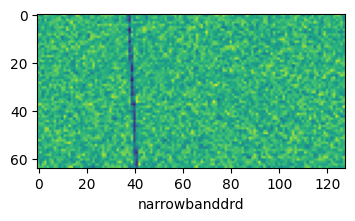

In [126]:
plot_sample_image(x_train,y_train,820)
print(y_train_list[2163])


narrowband


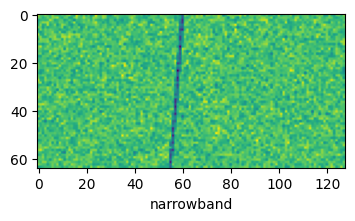

In [127]:
plot_sample_image(x_train,y_train,3100)

squiggle


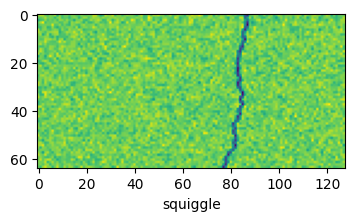

In [128]:
plot_sample_image(x_train,y_train,1)

noise


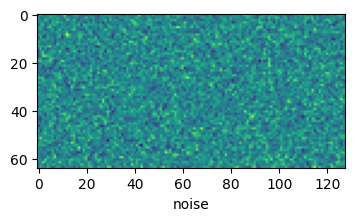

In [129]:
plot_sample_image(x_train,y_train,1601)

****Image Preprocssing : Create Training and Validation Data Generators using Keras ImageDataGenerator function**

In [130]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [131]:
X_gen_train = ImageDataGenerator(horizontal_flip=True)
X_gen_train.fit(x_train)

X_gen_val = ImageDataGenerator(horizontal_flip=True)
X_gen_val.fit(x_val)

In [132]:
x_train.shape

(3200, 64, 128, 1)

In [133]:
len(x_train)

3200

                    *************     High Level Steps      ****************
                                      

• Design a Convolutional Neural Network (CNN) Model.

• Compile the Model using Adam optimizer, categorical_crossentropy loss function, and
accuracy metric.

• Print the Model summary.

• Train the Model with batch_size = 32 & epochs = 12.

• Evaluate the Model.

o Use the model.evaluate function to evaluate the accuracy.

o Print a Classification Report and the accuracy score (classification accuracy).

o Display a Confusion Matrix to evaluate the performance of the model.

#####################################################
*****************************************************
Basic CNN model ( The accuracy of the CNN model on the test dataset is  25% ) 

Total params: 1,739,460

Trainable params: 1,739,460

Non-trainable params: 0
******************************************************
#####################################################

In [134]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [194]:
cnn = models.Sequential([
    #defining the feature learning part of the architecture
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation="relu", input_shape=(64,128,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation = "relu"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    #defining the classification part of the architecture
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(4, activation = "softmax" )
])

In [195]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 26880)             0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [198]:
cnn.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics="accuracy")

In [199]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 26880)             0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [200]:
cnn.fit(x_train,y_train, epochs=12, batch_size=32)

Epoch 1/12
100/100 [==============================] - 36s 350ms/step - loss: 1.3905 - accuracy: 0.2475
Epoch 2/12
100/100 [==============================] - 38s 385ms/step - loss: 1.3864 - accuracy: 0.2444
Epoch 3/12
100/100 [==============================] - 36s 362ms/step - loss: 1.3864 - accuracy: 0.2306
Epoch 4/12
100/100 [==============================] - 36s 361ms/step - loss: 1.3864 - accuracy: 0.2341
Epoch 5/12
100/100 [==============================] - 35s 349ms/step - loss: 1.3864 - accuracy: 0.2422
Epoch 6/12
100/100 [==============================] - 36s 360ms/step - loss: 1.3864 - accuracy: 0.2500
Epoch 7/12
100/100 [==============================] - 36s 361ms/step - loss: 1.3864 - accuracy: 0.2500
Epoch 8/12
100/100 [==============================] - 36s 363ms/step - loss: 1.3864 - accuracy: 0.2406
Epoch 9/12
100/100 [==============================] - 35s 350ms/step - loss: 1.3864 - accuracy: 0.2359
Epoch 10/12
100/100 [==============================] - 36s 357ms/step - l

In [201]:
test_loss, test_accuracy = cnn.evaluate(x_val,y_val)

print("The accuracy of the CNN model on the test dataset is ",test_accuracy )

25/25 [==============================] - 2s 84ms/step - loss: 1.3863 - accuracy: 0.2500
The accuracy of the CNN model on the test dataset is  0.25


In [202]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(cnn.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 2s 81ms/step
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       200
           1       0.00      0.00      0.00       200
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200

    accuracy                           0.25       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.06      0.25      0.10       800

Classification accuracy: 0.250000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####################################################
*****************************************************

CNN model with validation data check  ( The accuracy of the CNN model on the test dataset is  25% )

Total params: 1,739,460

Trainable params: 1,739,460

Non-trainable params: 0

*****************************************************
#####################################################

In [203]:
#callbacks = [PlotLossesCallback(), checkpoint]
batch_size = 32
history = cnn.fit(
    X_gen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data = X_gen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val)//batch_size,
    epochs=12)

Epoch 1/12
100/100 [==============================] - 41s 407ms/step - loss: 1.3864 - accuracy: 0.2350 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/12
100/100 [==============================] - 40s 399ms/step - loss: 1.3864 - accuracy: 0.2438 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/12
100/100 [==============================] - 40s 399ms/step - loss: 1.3864 - accuracy: 0.2344 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/12
100/100 [==============================] - 40s 404ms/step - loss: 1.3864 - accuracy: 0.2328 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/12
100/100 [==============================] - 41s 408ms/step - loss: 1.3864 - accuracy: 0.2350 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/12
100/100 [==============================] - 41s 407ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/12
100/100 [==============================] - 43s 424ms/step - loss: 1.3864 - accuracy: 0.2503 - val_loss: 1.3863 - val_ac

In [204]:
test_loss, test_accuracy = cnn.evaluate(x_val,y_val)

25/25 [==============================] - 3s 125ms/step - loss: 1.3863 - accuracy: 0.2500


In [205]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(cnn.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 2s 84ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       200
           2       0.25      1.00      0.40       200
           3       0.00      0.00      0.00       200

    accuracy                           0.25       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.06      0.25      0.10       800

Classification accuracy: 0.250000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####################################################
*****************************************************

CNN model with dropout and batch normalization introduced.  ( The accuracy of the CNN model on the test dataset is  36.8 % )

Total params: 33,582,852

Trainable params: 33,580,612

Non-trainable params: 2,240


*****************************************************
#####################################################

In [145]:
cnn1 = Sequential()

# 1st Convolution
cnn1.add(Conv2D(32,(3,3), padding='same', input_shape=(64, 128,1)))
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

# 2nd Convolution layer
cnn1.add(Conv2D(64,(3,3), padding='same'))
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

# Flattening
cnn1.add(Flatten())

# Fully connected layer
cnn1.add(Dense(1024))
cnn1.add(BatchNormalization())
cnn1.add(Activation('relu'))
cnn1.add(Dropout(0.4))

cnn1.add(Dense(4, activation='softmax'))

In [146]:
cnn1.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics="accuracy")

In [147]:
cnn1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 128, 32)       320       
                                                                 
 batch_normalization_9 (Batc  (None, 64, 128, 32)      128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 32, 64, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 64, 64)       

In [148]:
cnn1.fit(x_train,y_train, epochs=12, batch_size=32)

Epoch 1/12
100/100 [==============================] - 128s 1s/step - loss: 0.5853 - accuracy: 0.6950
Epoch 2/12
100/100 [==============================] - 127s 1s/step - loss: 0.4245 - accuracy: 0.7513
Epoch 3/12
100/100 [==============================] - 129s 1s/step - loss: 0.3910 - accuracy: 0.7766
Epoch 4/12
100/100 [==============================] - 128s 1s/step - loss: 0.3665 - accuracy: 0.7837
Epoch 5/12
100/100 [==============================] - 128s 1s/step - loss: 0.3648 - accuracy: 0.7850
Epoch 6/12
100/100 [==============================] - 130s 1s/step - loss: 0.3455 - accuracy: 0.8169
Epoch 7/12
100/100 [==============================] - 128s 1s/step - loss: 0.3607 - accuracy: 0.8191
Epoch 8/12
100/100 [==============================] - 128s 1s/step - loss: 0.3188 - accuracy: 0.8403
Epoch 9/12
100/100 [==============================] - 127s 1s/step - loss: 0.2896 - accuracy: 0.8650
Epoch 10/12
100/100 [==============================] - 133s 1s/step - loss: 0.2633 - accura

In [149]:
test_loss, test_accuracy = cnn1.evaluate(x_val,y_val)

print("The accuracy of the CNN model on the test dataset is ",test_accuracy )

25/25 [==============================] - 6s 226ms/step - loss: 17.1092 - accuracy: 0.3688
The accuracy of the CNN model on the test dataset is  0.3687500059604645


In [193]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(cnn1.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 9s 333ms/step
              precision    recall  f1-score   support

           0       1.00      0.47      0.64       200
           1       0.00      0.00      0.00       200
           2       0.00      0.00      0.00       200
           3       0.28      1.00      0.44       200

    accuracy                           0.37       800
   macro avg       0.32      0.37      0.27       800
weighted avg       0.32      0.37      0.27       800

Classification accuracy: 0.368750


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
y_pred = cnn1.predict(x_val)
y_pred[:5]

25/25 [==============================] - 6s 242ms/step


array([[8.7832091e-03, 6.9767168e-23, 7.0194902e-21, 9.9121672e-01],
       [5.4850017e-07, 1.0063690e-19, 2.0490141e-19, 9.9999934e-01],
       [3.8141009e-04, 3.6132539e-19, 3.1084574e-19, 9.9961859e-01],
       [1.4409662e-02, 1.5363528e-19, 3.7981024e-19, 9.8559034e-01],
       [4.7008434e-05, 1.5614254e-19, 1.3663428e-20, 9.9995297e-01]],
      dtype=float32)

In [152]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:20]

[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0]

In [153]:
y_val_list = y_val.tolist()

In [154]:
def plot_sample_image1(X,y,i):
  plt.figure(figsize=(15,2))
  plt.imshow(X[i])
  print(output_class_labels[y_val_list[i].index(1)])
  plt.xlabel(output_class_labels[y_val_list[i].index(1)])

squiggle


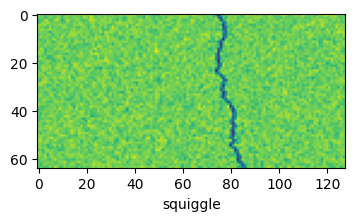

In [155]:
plot_sample_image1(x_val,y_val,20)

In [156]:
output_class_labels[y_pred_classes[20]]

'squiggle'

In [157]:
output_class_labels

['squiggle', 'narrowband', 'narrowbanddrd', 'noise']

noise


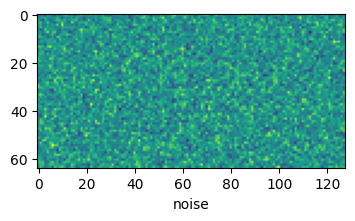

In [159]:
plot_sample_image1(x_val,y_val,500)

In [160]:
output_class_labels[y_pred_classes[500]]

'noise'


#####################################################
*****************************************************

CNN model with dropout and batch normalization introduced. In this iteration shuffling of train data happens so that the model has more oppertunity to learn.  

The accuracy of the CNN model on the test dataset is  51.9 %

Total params: 33,582,852

Trainable params: 33,580,612

Non-trainable params: 2,240

*****************************************************
#####################################################

In [161]:
cnn2 = Sequential()

# 1st Convolution
cnn2.add(Conv2D(32,(3,3), padding='same', input_shape=(64, 128,1)))
cnn2.add(BatchNormalization())
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.25))

# 2nd Convolution layer
cnn2.add(Conv2D(64,(3,3), padding='same'))
cnn2.add(BatchNormalization())
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.25))

# Flattening
cnn2.add(Flatten())

# Fully connected layer
cnn2.add(Dense(1024))
cnn2.add(BatchNormalization())
cnn2.add(Activation('relu'))
cnn2.add(Dropout(0.4))

cnn2.add(Dense(4, activation='softmax'))

In [162]:
cnn2.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics="accuracy")

In [163]:
cnn2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 128, 32)       320       
                                                                 
 batch_normalization_12 (Bat  (None, 64, 128, 32)      128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 32, 64, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 64, 64)       

In [164]:
batch_size = 32
history = cnn2.fit(
    X_gen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data = X_gen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val)//batch_size,
    epochs=12)

Epoch 1/12
100/100 [==============================] - 137s 1s/step - loss: 0.5084 - accuracy: 0.7206 - val_loss: 6.2726 - val_accuracy: 0.2500
Epoch 2/12
100/100 [==============================] - 134s 1s/step - loss: 0.4363 - accuracy: 0.7347 - val_loss: 6.6865 - val_accuracy: 0.2500
Epoch 3/12
100/100 [==============================] - 138s 1s/step - loss: 0.3864 - accuracy: 0.7588 - val_loss: 7.3490 - val_accuracy: 0.2500
Epoch 4/12
100/100 [==============================] - 136s 1s/step - loss: 0.4060 - accuracy: 0.7688 - val_loss: 8.3585 - val_accuracy: 0.2500
Epoch 5/12
100/100 [==============================] - 131s 1s/step - loss: 0.3888 - accuracy: 0.7656 - val_loss: 5.3451 - val_accuracy: 0.2500
Epoch 6/12
100/100 [==============================] - 136s 1s/step - loss: 0.3694 - accuracy: 0.7747 - val_loss: 35.9932 - val_accuracy: 0.2500
Epoch 7/12
100/100 [==============================] - 142s 1s/step - loss: 0.3757 - accuracy: 0.7756 - val_loss: 4.2404 - val_accuracy: 0.482

In [165]:
test_loss, test_accuracy = cnn2.evaluate(x_val,y_val)

print("The accuracy of the CNN model on the test dataset is ",test_accuracy )

25/25 [==============================] - 6s 253ms/step - loss: 4.2100 - accuracy: 0.5200
The accuracy of the CNN model on the test dataset is  0.5199999809265137


In [166]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(cnn2.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 11s 409ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.39      0.81      0.53       200
           2       0.29      0.28      0.28       200
           3       1.00      0.99      1.00       200

    accuracy                           0.52       800
   macro avg       0.42      0.52      0.45       800
weighted avg       0.42      0.52      0.45       800

Classification accuracy: 0.520000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
y_pred = cnn2.predict(x_val)
y_pred[:5]

25/25 [==============================] - 5s 198ms/step


array([[1.5477727e-06, 5.7662570e-01, 4.2296645e-01, 4.0622853e-04],
       [1.3266260e-08, 3.8427386e-01, 6.1550701e-01, 2.1916794e-04],
       [1.1096935e-06, 2.3941481e-01, 7.5976580e-01, 8.1822538e-04],
       [1.5854248e-07, 5.6777394e-01, 4.3213597e-01, 8.9982226e-05],
       [7.4067867e-07, 6.5443832e-01, 3.4345883e-01, 2.1021513e-03]],
      dtype=float32)

In [168]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:20]

[1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1]

squiggle


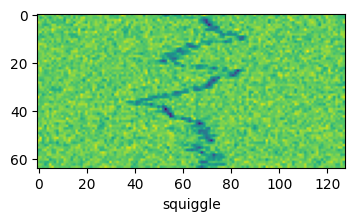

In [169]:
plot_sample_image(x_train,y_train,20)

In [170]:
output_class_labels[y_pred_classes[20]]

'narrowband'

In [171]:
output_class_labels

['squiggle', 'narrowband', 'narrowbanddrd', 'noise']

squiggle


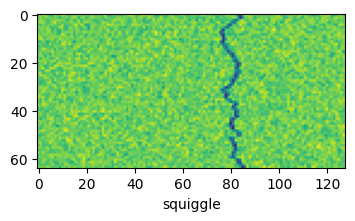

In [172]:
plot_sample_image(x_train,y_train,50)

In [173]:
output_class_labels[y_pred_classes[50]]

'narrowbanddrd'

In [174]:
output_class_labels

['squiggle', 'narrowband', 'narrowbanddrd', 'noise']




###################################################################
*******************************************************************



CNN model with below characteristcs 

1. Dropout and batch normalization.

2. Shuffling of Training data.

3. Learning rate introduced so that hyperparameters are adjusted on the run. 


The accuracy of the CNN model on the test dataset is  72 % 



Total params: 33,582,852

Trainable params: 33,580,612

Non-trainable params: 2,240


*******************************************************************
###################################################################



In [175]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)

In [176]:
cnn3 = Sequential()

# 1st Convolution
cnn3.add(Conv2D(32,(3,3), padding='same', input_shape=(64, 128,1)))
cnn3.add(BatchNormalization())
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

# 2nd Convolution layer
cnn3.add(Conv2D(64,(3,3), padding='same'))
cnn3.add(BatchNormalization())
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

# Flattening
cnn3.add(Flatten())

# Fully connected layer
cnn3.add(Dense(1024))
cnn3.add(BatchNormalization())
cnn3.add(Activation('relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Dense(4, activation='softmax'))

In [177]:
cnn3.compile(optimizer=optimizer,
            loss="categorical_crossentropy",
            metrics="accuracy")

In [178]:
cnn3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 128, 32)       320       
                                                                 
 batch_normalization_15 (Bat  (None, 64, 128, 32)      128       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 32, 64, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 64, 64)       

In [179]:
batch_size = 32
history = cnn3.fit(
    X_gen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data = X_gen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val)//batch_size,
    epochs=12)

Epoch 1/12
100/100 [==============================] - 146s 1s/step - loss: 0.5566 - accuracy: 0.7150 - val_loss: 6.0345 - val_accuracy: 0.2500
Epoch 2/12
100/100 [==============================] - 148s 1s/step - loss: 0.3946 - accuracy: 0.7584 - val_loss: 7.0362 - val_accuracy: 0.2500
Epoch 3/12
100/100 [==============================] - 146s 1s/step - loss: 0.3752 - accuracy: 0.7487 - val_loss: 7.9839 - val_accuracy: 0.2500
Epoch 4/12
100/100 [==============================] - 145s 1s/step - loss: 0.3674 - accuracy: 0.7613 - val_loss: 9.1159 - val_accuracy: 0.2500
Epoch 5/12
100/100 [==============================] - 145s 1s/step - loss: 0.3657 - accuracy: 0.7606 - val_loss: 9.6038 - val_accuracy: 0.2500
Epoch 6/12
100/100 [==============================] - 151s 2s/step - loss: 0.3660 - accuracy: 0.7691 - val_loss: 7.7753 - val_accuracy: 0.2500
Epoch 7/12
100/100 [==============================] - 152s 2s/step - loss: 0.3784 - accuracy: 0.7734 - val_loss: 2.6050 - val_accuracy: 0.3963

In [180]:
test_loss, test_accuracy = cnn3.evaluate(x_val,y_val)

print("The accuracy of the CNN model on the test dataset is ",test_accuracy )

25/25 [==============================] - 5s 197ms/step - loss: 0.4367 - accuracy: 0.7262
The accuracy of the CNN model on the test dataset is  0.7262499928474426


In [181]:
y_pred = cnn3.predict(x_val)
y_pred[:5]

25/25 [==============================] - 6s 254ms/step


array([[9.99998033e-01, 8.34945581e-07, 1.04266837e-06, 7.61486221e-11],
       [9.65589464e-01, 1.26869995e-02, 2.17208434e-02, 2.59851004e-06],
       [9.99549806e-01, 3.15416954e-04, 1.34664428e-04, 7.90169423e-08],
       [9.99380291e-01, 2.54826649e-04, 3.64939478e-04, 3.59589869e-09],
       [9.97142911e-01, 1.22453552e-03, 1.63241662e-03, 6.08311481e-08]],
      dtype=float32)

In [182]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0]

In [183]:
output_class_labels

['squiggle', 'narrowband', 'narrowbanddrd', 'noise']

squiggle


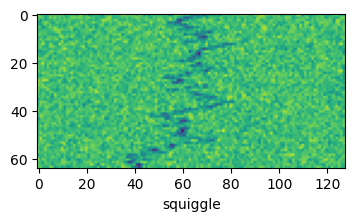

In [184]:
plot_sample_image1(x_val,y_val,50)

In [185]:
output_class_labels[y_pred_classes[50]]

'squiggle'

noise


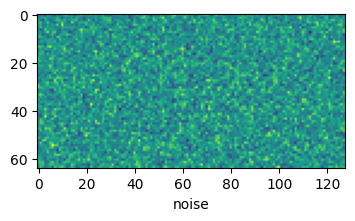

In [186]:
plot_sample_image1(x_val,y_val,500)

In [187]:
output_class_labels[y_pred_classes[500]]

'noise'

narrowband


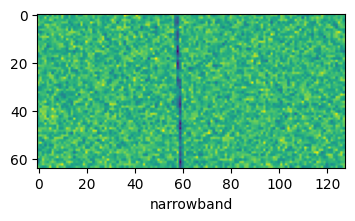

In [188]:
plot_sample_image1(x_val,y_val,700)

In [189]:
output_class_labels[y_pred_classes[700]]

'narrowband'

In [190]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(cnn3.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 5s 186ms/step
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       200
           1       0.48      0.56      0.52       200
           2       0.48      0.46      0.47       200
           3       1.00      0.97      0.99       200

    accuracy                           0.73       800
   macro avg       0.74      0.73      0.73       800
weighted avg       0.74      0.73      0.73       800

Classification accuracy: 0.726250


*****************************************      END       ***********************************************